In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:

df = pd.read_csv('customer_booking.csv', encoding='ISO-8859-1')

# print(df.head())
print(df.isnull().sum())
df.dtypes





In [ ]:
df_encoded = pd.get_dummies(df, drop_first=True)
print(df_encoded)
df_encoded['booking_complete'].value_counts()

In [ ]:
x = df_encoded.drop('booking_complete', axis=1)
y = df_encoded['booking_complete']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)


model = RandomForestClassifier(
    random_state=2,
    class_weight='balanced',
    n_estimators=200
)
model.fit(x_train, y_train)


y_proba = model.predict_proba(x_test)[:, 1]


precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8) 

best_f1_index = np.argmax(f1_scores)
best_threshold = thresholds[best_f1_index]
print(f"Best threshold (max F1): {best_threshold:.2f}")


y_pred = (y_proba > best_threshold).astype(int)

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



In [ ]:
# print("Precision:", precision)
# print("Recall:", recall)
# print("Thresholds:", thresholds)

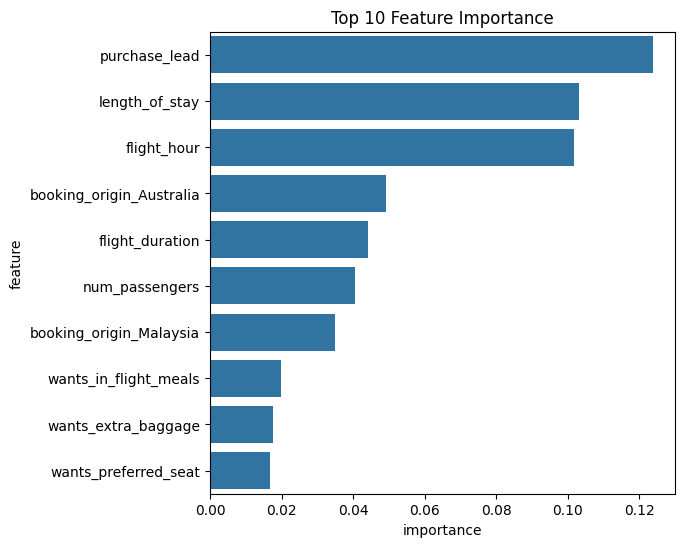

In [6]:
importances = model.feature_importances_
features = x.columns
importance_df = pd.DataFrame({
    'feature': features,
    'importance': importances
})

importance_df = importance_df.sort_values(by='importance', ascending=False).head(10)


plt.figure(figsize=(6, 6))
sns.barplot(data=importance_df, x='importance', y='feature')
plt.title('Top 10 Feature Importance')
plt.show()

In [ ]:
scores = cross_val_score(model, x, y, cv=5, scoring='f1')
print("F1-score per fold:", scores)
print("Average F1-score:", scores.mean())